In [10]:
# 导入需要用到的库
import jieba
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 导入本地txt文件
f = open('/穿成七零白富美.txt', 'r',encoding='gb18030').read()


# 使用jieba中文分词，jieba分词有多种模式，这里我们选用精确分词，避免词云词语出现重复 了解地址：https://github.com/fxsjy/jieba
# 把 generator 转化为字符串
cut_text = " ".join(jieba.cut(f, cut_all=False))

#查看分好的前200个字符
cut_text[:200]

'= = = = = = = = = = = = = = = = = = \n 《 穿 成七零白富 美 》 \n 作者 ： 似伊 \n \n \n \u3000 \u3000 【 文案 】 ： \n \u3000 \u3000 一 觉醒 来 ， 叶秋秋 穿越 了 \n \u3000 \u3000 带 着 一个 玉佩 空间 来到 了 吃不饱 ， 穿 不 暖 的 七十年代 ， 成为 红旗 生产队 大队长 家 的 闺女 \n \u3000 \u3000 生产队 里 有 个 传言 ， 那 老 叶家 啊'

In [16]:
# 选好一张本地图片，作为词云蒙版
path_img ='/Downloads/timg.jpeg'

#将image转化为矩阵
background_image = np.array(Image.open(path_img))

# 提取图片中的主要颜色，反馈到词云中的文字上
image_colors = ImageColorGenerator(background_image)


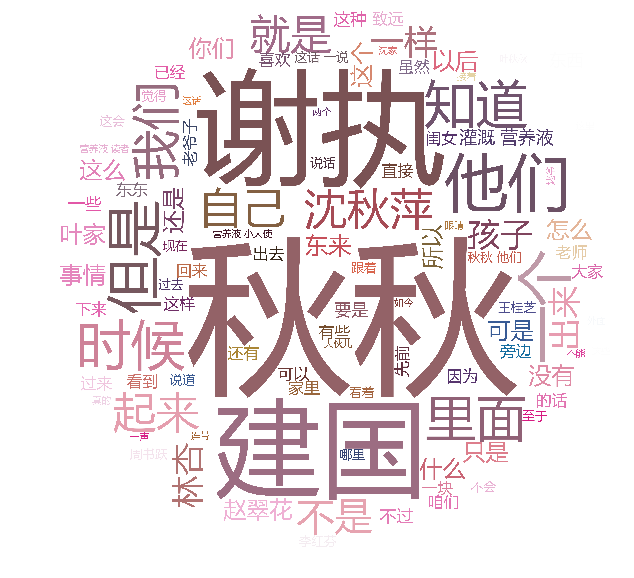

In [18]:
wordcloud = WordCloud(font_path='/Users/xxhuang/Library/Fonts/msyh.ttf', # 本地中文字体，不加会乱码
                      mask=background_image,  #传入蒙版图像矩阵，使得词云的分布与传入的蒙版图像一致，也就是要传入矩阵格式
                      height=400, # 高度设置为400
                      width=800, # 宽度设置为800
                      scale=20, # 长宽拉伸程度设置为20
                      max_words=100, # 控制一张画布中最多绘制的词个数，默认为200
                      background_color='white' # 背景色为白色
                     ).generate(cut_text)
plt.figure(figsize=[12, 10])
#plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func=image_colors), alpha=1)
plt.axis('off')
plt.show()